In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import math as math

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [5]:
def association_analysis(dataset):
    df = pd.read_csv(dataset)

    # Convert the items column into a list of lists
    # transactions = df['atrribute1'].apply(lambda x: [item.strip() for item in x.split(',')])

    # Convert the dataset into a one-hot encoded format
    te = TransactionEncoder()
    te_ary = te.fit(df.groupby('ID')['Primary Type'].apply(list)).transform(df.groupby('ID')['Primary Type'].apply(list))
    df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

    # Use Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(df_transformed, min_support=0.05, use_colnames=True)
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)

    # Display the results
    print("Frequent Itemsets:")
    print(frequent_itemsets)

    print("\nAssociation Rules:")
    print(rules)






In [6]:
association_analysis('../data/testing_training/testing_data.csv')

Frequent Itemsets:
    support           itemsets
0  0.064366          (ASSAULT)
1  0.182386          (BATTERY)
2  0.055723         (BURGLARY)
3  0.114204  (CRIMINAL DAMAGE)
4  0.097460        (NARCOTICS)
5  0.061959    (OTHER OFFENSE)
6  0.212859            (THEFT)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [11]:
def plot_dataset(dataset):
    crime_data = pd.read_csv(dataset)
    crime_data['Date'] = pd.to_datetime(crime_data['Date'])
    crime_data.set_index('Date', inplace=True)

    # Resample data to get counts by month (you can change it to 'D' for day, 'W' for week, etc.)
    monthly_counts = crime_data.resample('Y').size()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(monthly_counts, marker='o', linestyle='-')
    plt.title('Chicago Crime Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Crimes')

    tick_positions = pd.date_range(start=crime_data.index.min(), end=crime_data.index.max(), freq='2Y')
    plt.xticks(tick_positions, tick_positions.strftime('%Y'))

    plt.show()

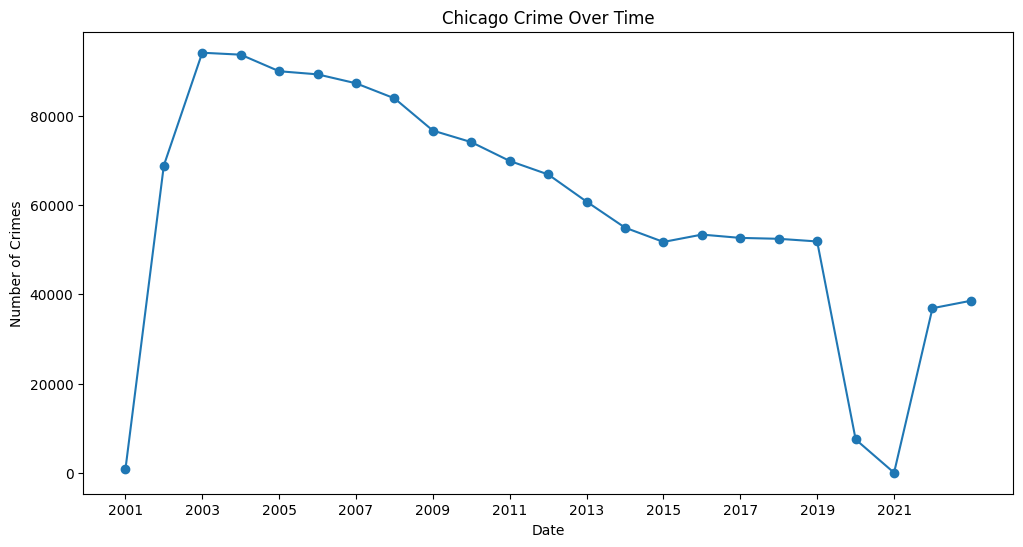

In [12]:
plot_dataset('../data/testing_training/testing_data.csv')

In [34]:
def compare_data(dataset, attribute1, attribute2):
    crime_data = pd.read_csv(dataset)

    # Create a cross-tabulation (pivot table) of Primary_Type and District
    cross_tab = pd.crosstab(crime_data[attribute1], crime_data[attribute2])

    # Plotting a heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(cross_tab, cmap='coolwarm', annot=False, fmt="d", linewidths=.5)
    plt.title('Crime Distribution by Primary Type and District')
    plt.xlabel(attribute2)
    plt.ylabel(attribute1)
    plt.show()

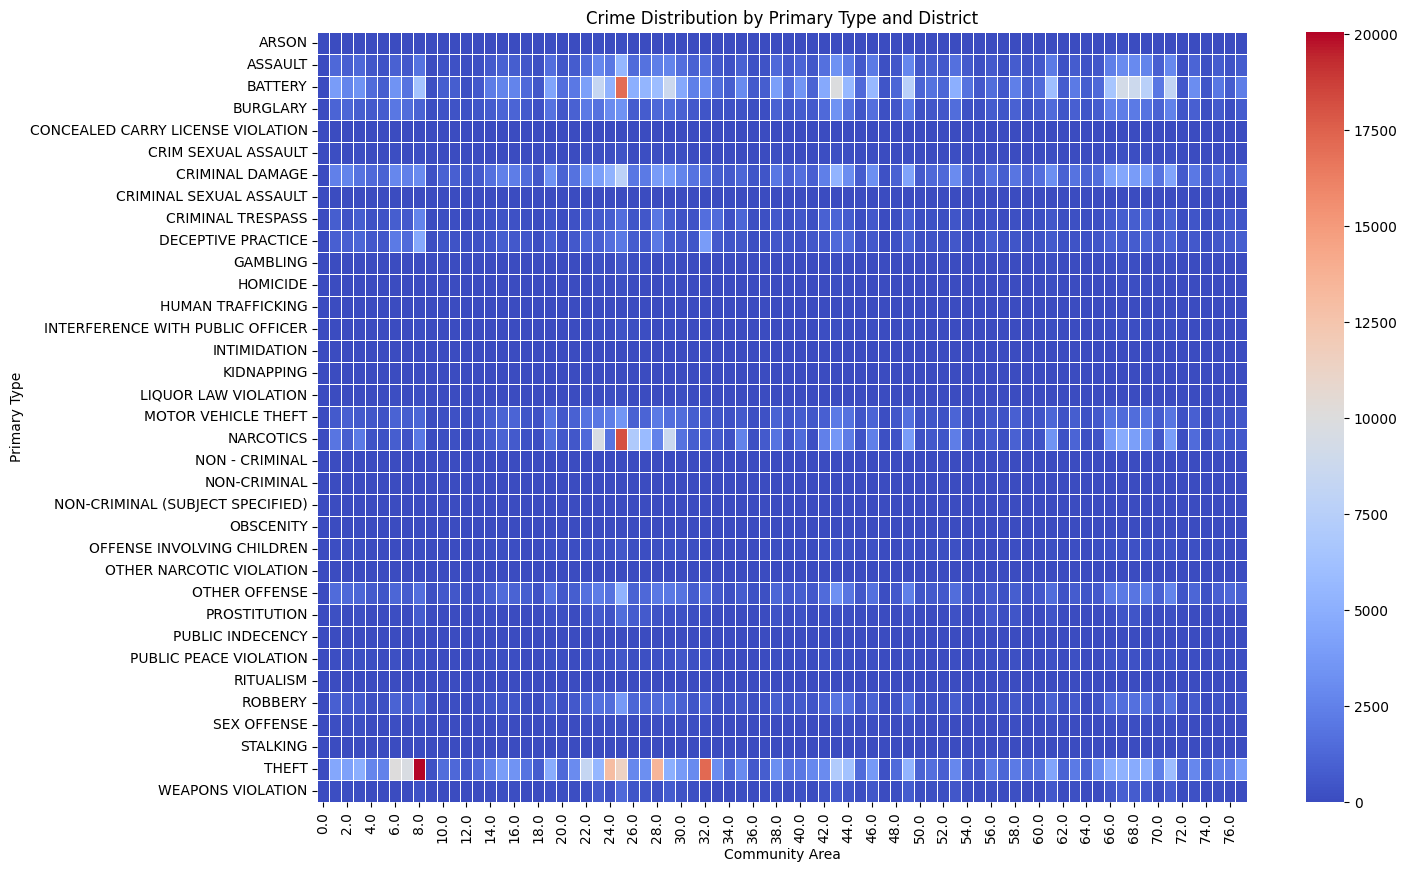

In [35]:
compare_data('../data/testing_training/testing_data.csv', 'Primary Type', 'Community Area')

In [19]:
def min_max_atribute(dataset, attribute):
    df = pd.read_csv(dataset)

    min_value = df[attribute].min()
    max_value = df[attribute].max()

    print(f"Minimum value of {attribute}: {min_value}")
    print(f"Maximum value of {attribute}: {max_value}")

In [21]:
min_max_atribute('../data/testing_training/testing_data.csv', 'Community Area')

Minimum value of Community Area: 0.0
Maximum value of Community Area: 77.0


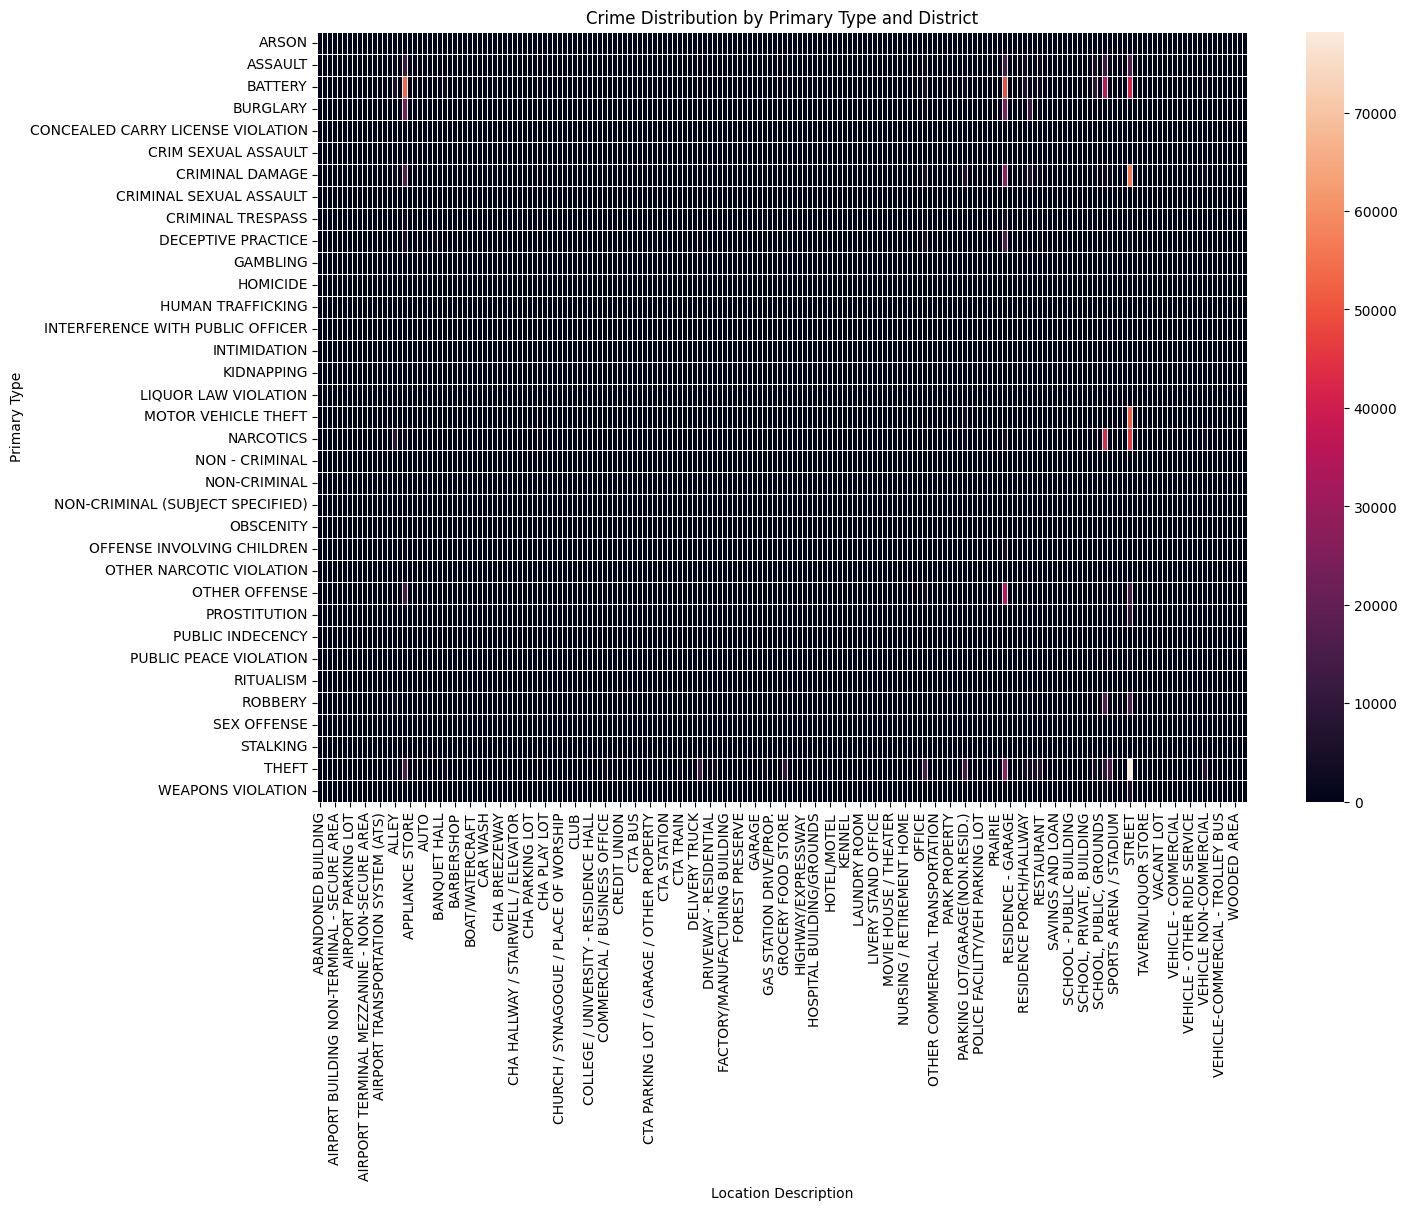

In [33]:
compare_data('../data/testing_training/testing_data.csv', 'Primary Type', 'Location Description')